# K-Means Clustering for customer segmentation

There are many models for clustering, but in this notebook, we will focus on one of the simplest and most widely used models: K-means. Despite its simplicity, **K-means** is extensively used in various data science applications, particularly when quick insights are needed from unlabeled data.

Some real-world applications of K-means include:

- **Customer Segmentation**: Grouping customers based on purchasing behavior, preferences, and demographics to tailor marketing strategies.
- **Understanding Website Visitor Behavior**: Analyzing web traffic to identify different types of visitors and their goals, enhancing user experience and website design.
- **Pattern Recognition**: Identifying patterns and trends in data, which is useful in image and speech recognition.
- **Machine Learning**: Serving as a preprocessing step to organize data, reduce dimensionality, and improve the performance of other algorithms.
- **Data Compression**: Reducing the amount of data by clustering similar data points, which simplifies storage and speeds up processing.
- **Market Research**: Segmenting survey respondents to understand different market segments and their needs.
- **Document Clustering**: Grouping similar documents for organizing large sets of text data, such as news articles or research papers.
- **Social Network Analysis**: Detecting communities within social networks to understand social structures and influence.
- **Anomaly Detection**: Identifying unusual data points that do not fit into any cluster, which is useful for fraud detection and network security.
- **Image Segmentation**: Dividing an image into segments to simplify its representation and make analysis easier, often used in medical imaging.

### Loading the required libraries in python.

In [1]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

%matplotlib inline

### Dataset Description
Imagine that you have a customer dataset and need to apply customer segmentation on this historical data. Customer segmentation involves partitioning a customer base into groups of individuals with similar characteristics. This strategy is crucial for businesses to effectively target specific customer groups and allocate marketing resources efficiently.

For example, one group might consist of high-profit, low-risk customers who are more likely to purchase products or subscribe to services, requiring strategies to retain them. Another group might include customers from non-profit organizations, needing different marketing approaches.

### Downloading the dataset

In [2]:
customerfile = os.path.join('Storage', 'Mall_Customers.csv')
df = pd.read_csv(customerfile)
display(df)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Feature selection for the model
Considering only 2 features (Annual income and Spending Score) and no Label available

In [3]:
X= df.iloc[:, [3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Viewing the available features in dataset

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Applying K-means Clustering on the dataset
We cam guess the optimal number of clusters by using the Elbow graph method as shown below.

In [5]:
wcss=[]
labels = []

for i in range(1,15):
    k_means = KMeans(init = "k-means++", n_clusters = i, random_state=0)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
    
labels.append(k_means.labels_)

print(labels)
print(wcss)

[array([ 3,  4,  7,  4,  3,  4,  7, 12,  7,  4,  7, 12,  7,  4,  7,  4,  3,
       11,  3, 12,  3, 11,  7, 11,  7, 12,  3, 11,  3, 12,  7, 11,  7, 12,
        7, 12,  7, 11,  3, 11,  3, 12,  3,  6,  3, 11,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  0,  6,  6,  0,  6,  0,  6,  6,  0,  0,  6,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1, 13,  1, 13,  1, 10,  1, 10,  1, 13,  9, 10,  1,
       10,  9, 10,  9, 10,  1, 13,  1, 10,  1, 13,  9,  2,  1,  2,  1,  2,
        9,  2,  1, 10,  9, 10,  9, 13,  1, 10,  1,  2,  9,  2,  1,  2,  9,
        2,  9,  2,  1,  2,  9,  2,  9,  2,  9, 13,  9,  2,  9, 13,  1,  8,
        9,  8,  9,  8,  9,  8,  5,  8,  5,  8,  5,  8,  5], dtype=int32)]
[269981.28, 185917.14253928518, 106348.37306211119, 73679.78903948837, 44448.45544793371, 38858.9599

C:\Users\MOHAMMEDG\Anaconda3\envs\training\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\MOHAMMEDG\Anaconda3\envs\training\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


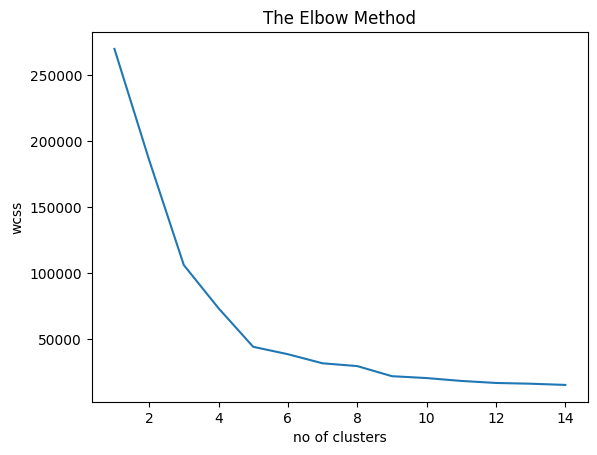

In [6]:
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

If you zoom out this curve then you will see that elbow comes at k=5
no matter what range we select we will see the same behaviour but if we chose higher range it will be a little difficult to visualize the ELBOW
that is why we usually prefer a small range (1,15)

**Finally we got that k=5**

### Clustering with k=5

In [7]:
k_means = KMeans(init = "k-means++", n_clusters = 5, random_state=0)
k_means.fit(X)
labels_ = k_means.labels_
y_kmeans= k_means.fit_predict(X)

### Visualizing the clusters with their centers

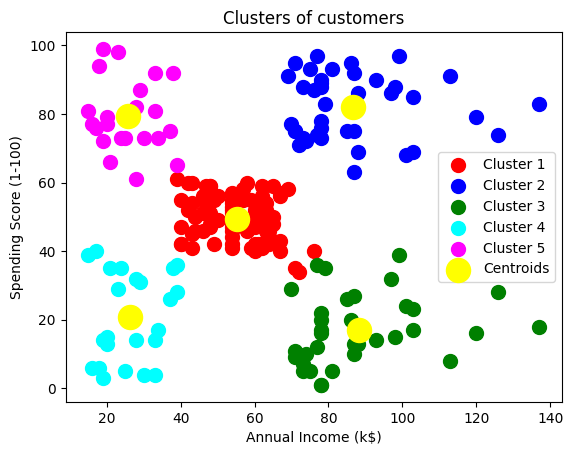

In [8]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Model Interpretation
### Cluster 1 (Red Color) -> earning high but spending less
### cluster 2 (Blue Color) -> average in terms of earning and spending
### cluster 3 (Green Color) -> earning high and also spending high
### cluster 4 (cyan Color) -> earning less but spending more
### Cluster 5 (magenta Color) -> Earning less , spending less